<a href="https://colab.research.google.com/github/hemoabdullah/ML-SMT5/blob/main/JS11_Hammam_Abdullah_2341720203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS11 - Classification 2

Name: Hammam Abdullah Saeed B.G

N.A : 10

Nim : 2341720203

Class : TI_3i


# Lab 1
SVM Classification with Linear Dummy Data

**Introduction**

This practicum requires a dataset to be processed into an analysis of the output of the SVM method. Follow the instructor's instructions regarding the data that can be used and the appropriate characteristics for this practicum. The data displayed on the worksheet is only an example; students must find their own data and ensure it aligns with a case study that can be solved with SVM.

## 1 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## 2 - Creating Dummy Data

In this practicum, we used a simple generative model to determine labels for new points. The dummy data case shows two separate classes.

The result,

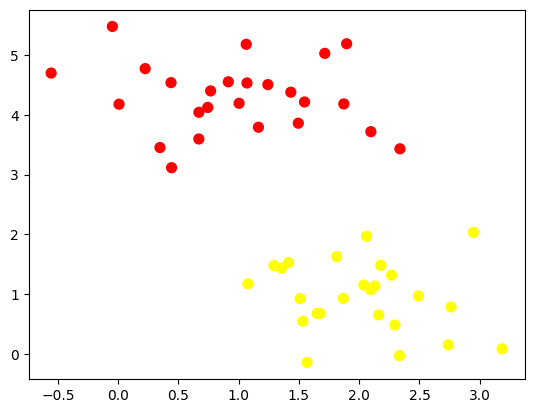

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## 3 - Create a Separator Line Illustration

To create a classification model, a dividing line is required to separate the data from the two formed sets. However, this situation still leaves open the possibility of requiring more than one dividing line.

The number of dividing lines indicates that several possibilities exist for a new data set to fall into a particular category. A new data set 'x' appears in a different position than the data in the other two sets, so this new data set does not fall into the category of the previous two sets.

## 4 - Margin Illustration

Margins in a line can also be used to clarify the position of data relative to the label.

(-1.0, 3.5)

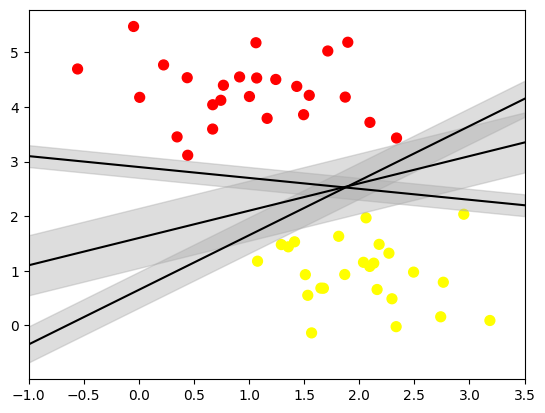

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

The margin used in SVM serves to indicate the most optimal model. This optimality criterion is obtained by determining which line maximizes the existing margin.

## 5 - Fitting the Model

Next, we'll train the SVM model. This time, the model will use a linear function (kernel).

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Next, create a function to help visualize the model fit results.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Do a plot with the function that has been created.

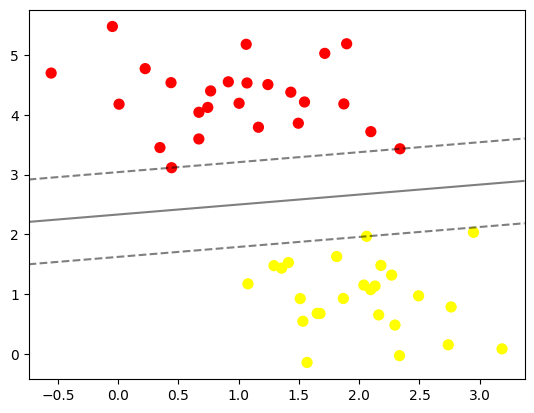

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Several data points that touch (enter the area of) the line are called support vectors. To find out which data is included in the support vector, you can callsupport_vectors_

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Got a point,

In [ ]:
array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

The fitting results are key to a classifier's success (which is only measured by the position of the support vector). Other data points that are far from the margin and remain within the correct area have no ability to modify the fitting (because they are not support vectors). These data points do not contribute to the loss function used for model fitting. To better understand this, 60 and 120 initial data sets are used as examples for comparison.

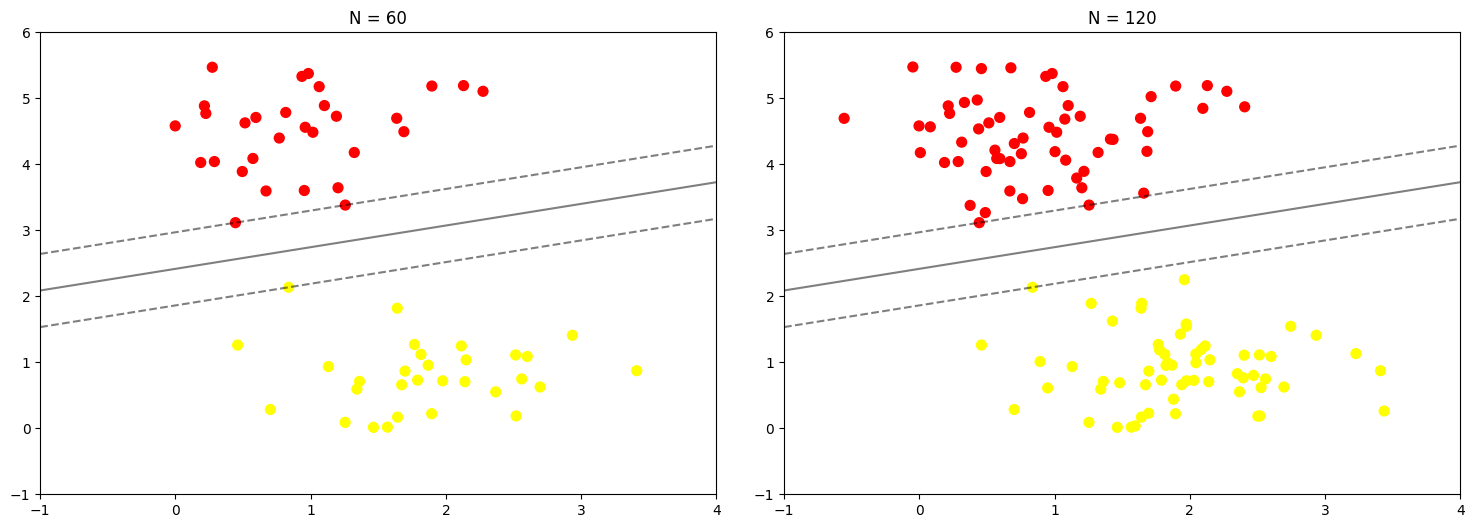

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### changes in the amount of data do not affect the model used. A clearer illustration can be seen in the diagram below.

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# Lab 2

SVM Classification with Non-Linear Dummy Data

**Introduction**

In this second lab, we will try using SVM to classify data with a non-linear distribution. Using the kernel trick , SVM is also able to make decision boundaries on non-linear data.

## 1 - Illustration of Non-Linear Data

Nonlinearly separated data poses a problem for SVM models. Therefore, a kernel is necessary for SVMs to fit nonlinear relationships with a linear classifier.

### - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### - Recreate the Plotting Function

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

###- Create Non-Linear Dummy Data

The result,

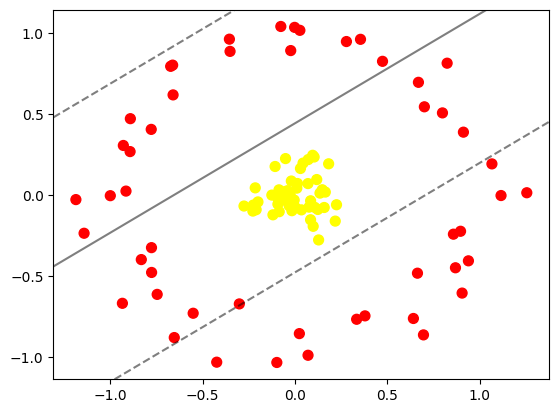

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Based on the example data above, no linear dividing line was found that could act as a data separator. Therefore, another projection (viewpoint) of the data is needed to clearly separate the data. In this activity, the projection used is a radial-based projection. Define the radial function in the code.

In [ ]:
r = np.exp(-(X**2).sum(1))

Since radial projection is not sufficient using 2D model, the visualization plot is converted into 3D model.

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.02629762,  0.0025447 ],
       [-0.35130471,  0.88556055],
       [-0.93420645, -0.66912766],
       [ 0.69607378, -0.8640332 ],
       [-0.00412713, -0.03178625],
       [-0.03129315, -0.06676335],
       [-1.18603409, -0.02908725],
       [ 0.15854643, -0.07787937],
       [ 0.07068312,  0.06970231],
       [-0.09217409, -0.05712588],
       [ 0.79888351,  0.50592038],
       [-0.83185206, -0.39930978],
       [ 0.22520258, -0.0608598 ],
       [ 0.09888035, -0.19400107],
       [-0.42343653, -1.03244154],
       [ 0.70094632,  0.54349488],
       [ 0.12392945, -0.08997329],
       [ 0.04389551,  0.19601837],
       [-0.22669753, -0.07410541],
       [-0.22562197, -0.06295231],
       [-0.89109822,  0.47024558],
       [ 0.21835023, -0.16187322],
       [ 0.82420263,  0.81265415],
       [ 0.27882837,  0.94623411],
       [-0.27583557, -0.06888649],
       [-0.999697  , -0.00499667],
       [-0.01626226, -0.0976537 ],
       [-0.03837615, -0.00259391],
       [-0.35478881,  0.96085725],
       [ 0.00335546, -0.07892121],
       [-0.10734986,  0.17516046],
       [ 0.14794405,  0.03157175],
       [-0.91478538,  0.02334191],
       [-0.09150186, -0.02327614],
       [-0.55101437, -0.73044942],
       [ 0.07097981, -0.98976114],
       [-0.06054239,  0.01865807],
       [ 0.66877617,  0.69460779],
       [-0.6597807 ,  0.61700049],
       [ 0.12828441, -0.278083  ],
       [ 1.06672449,  0.1912436 ],
       [ 0.89683703, -0.22457037],
       [-0.67282101,  0.79328697],
       [-0.11902107, -0.12306345],
       [-0.77669768, -0.32563975],
       [ 0.85826361, -0.24254808],
       [-0.65331872, -0.88054357],
       [ 0.86929623, -0.4498189 ],
       [ 0.10399753,  0.23376627],
       [ 0.02402629, -0.85613539],
       [-0.01949879,  0.08548577],
       [-0.08515543, -0.1037603 ],
       [ 0.07631488, -0.07563045],
       [ 0.13569685,  0.01090968],
       [-0.0508719 ,  0.22394966],
       [-0.0341695 , -0.04722766],
       [-0.00171379,  1.03372433],
       [-0.1250082 , -0.00130357],
       [ 0.03526333, -0.09246246],
       [-0.92911382,  0.30491647],
       [ 0.90529855, -0.60604394],
       [-0.20997221, -0.09140914],
       [ 0.18258286,  0.19176977],
       [ 0.64150137, -0.76276869],
       [ 0.33423616, -0.76763052],
       [-0.05973383, -0.03123507],
       [-0.89260883,  0.26715153],
       [ 0.10744404, -0.07708484],
       [ 0.91239444,  0.38699865],
       [ 0.37930771, -0.74667093],
       [ 0.0138113 ,  0.07021095],
       [ 0.66356135, -0.48330668],
       [ 0.07203094,  0.2180073 ],
       [-0.77607591, -0.47872746],
       [ 0.08467407, -0.15352396],
       [ 0.16449171,  0.01732938],
       [-1.14172046, -0.23682163],
       [-0.74589425, -0.61406784],
       [-0.04089186,  0.02569783],
       [ 0.93944619, -0.40700989],
       [ 0.11810464,  0.09453781],
       [-0.30103786, -0.67285058],
       [ 0.47433377,  0.82415045],
       [-0.09797315, -1.03428949],
       [ 1.11604453, -0.00403197],
       [-0.66210647,  0.80071125],
       [-0.21486714,  0.04329144],
       [ 1.25559268,  0.01313925],
       [-0.0227349 ,  0.89052465],
       [-0.07633913,  1.03921845],
       [ 0.02677043,  1.01555436],
       [-0.77812357,  0.40418709],
       [ 0.35511554,  0.95997733],
       [ 0.09610741,  0.24430407],
       [ 0.01026532,  0.04159322],
       [ 0.02999719,  0.162805  ],
       [-0.08632795,  0.0310857 ],
       [-0.22780364, -0.09995758],
       [ 0.08496382, -0.03647479],
       [-0.20026091, -0.04338899]]), y=array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]))>

Note: May not run on Google Colab. Requires the interactive module from Jupyter Notebook and installation mpl_toolkits. Ensure the module ipywidgets is installed.

## 2 - Fitting the Model

Although data can be displayed separately, projecting N data points into N dimensions increases the computational burden. To address this, the radial basis function (RBF) kernel in Scikit-Learn is used.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot of decision boundaries results from RBF kernel

The result,

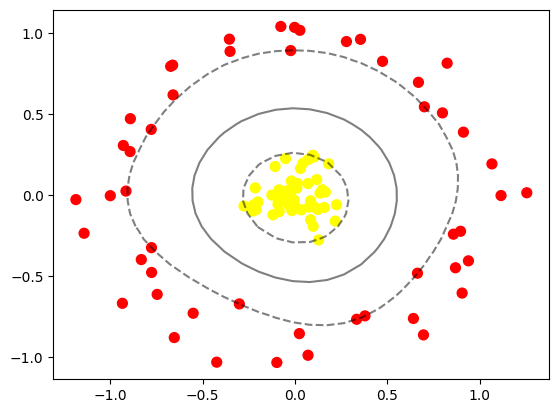

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Lab 3

SVM Data Overlapping

## 1 - Import Library and Create Plotting Function

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## 2 - Create Dummy Data

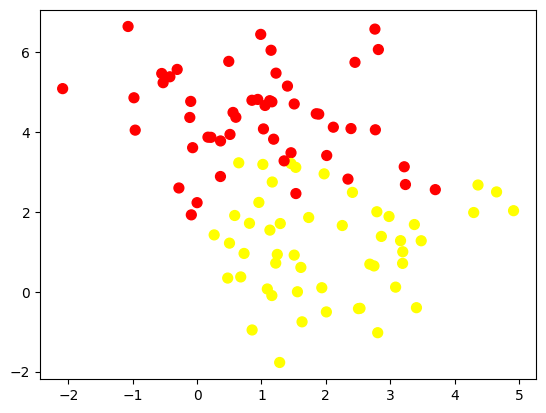

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## 3 - Tunning Impact Analysis

To address this issue, a margin smoothing technique can be applied to SVM. This technique involves inserting some data points into the margin to achieve a better fitting. The margin smoothing resulting from the smoothing technique is controlled by a tuning parameter (known as C). The example below demonstrates how changes to C affect the final fitting results.

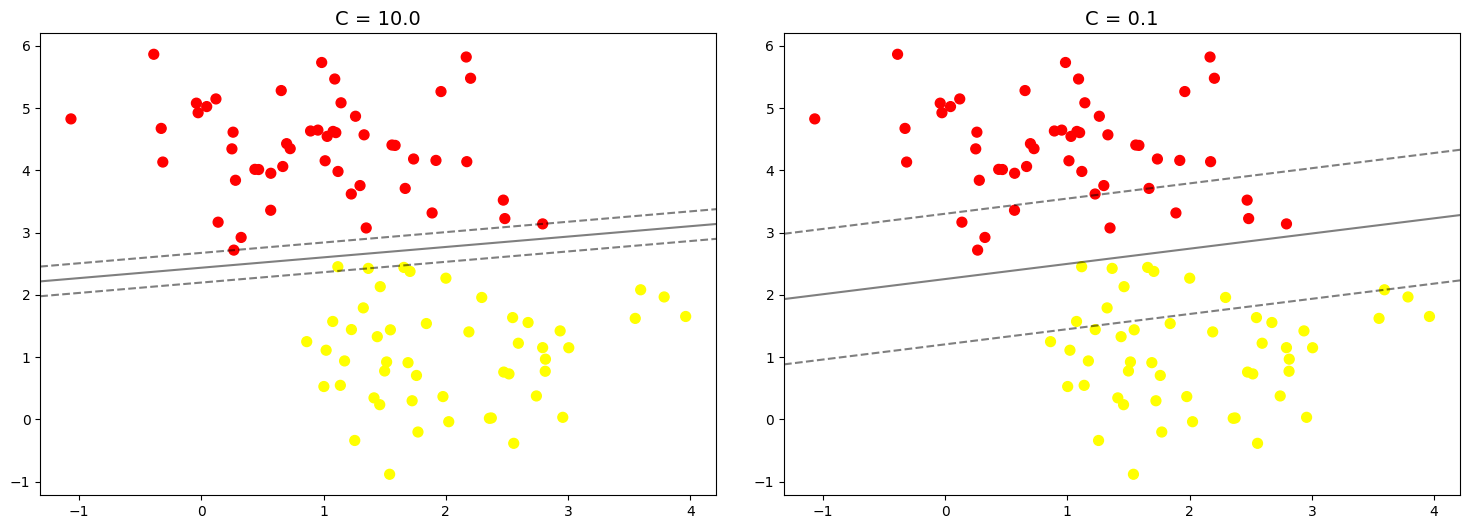

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

It should be noted that the optimal value of a C depends on each dataset (through cross-validation or similar procedures).

# Lab 4

Facial Image Classification

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## 1 - Facial Image Inspection

Perform an inspection of the facial image to be used.

Illustration obtained,

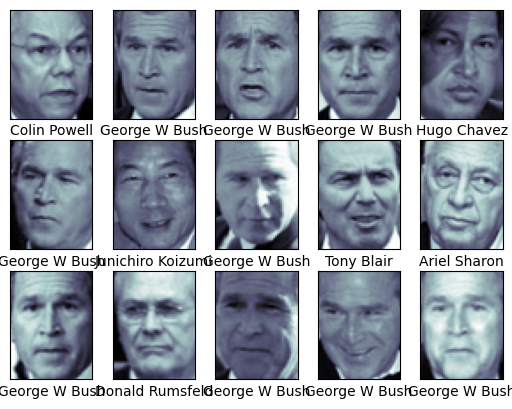

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 2 - Data Preprocessing

In this step, we'll attempt a simple data preprocessing process using Principal Component Analysis (PCA). PCA projects high-resolution (multidimensional) features into principal components , or features deemed important. PCA is often referred to as dimensionality reduction.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## 3 - Split Data

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## 4 - Modeling + Tuning

In this step, we will simulate model creation and hyperparameter tuning directly to find the best hyperparameter values. This can be achieved, among other things, using the [ ] technique GridSearch. GridSearch will attempt to find the best combination of hyperparameters by testing their performance one by one. This method is simple but time-consuming and computationally intensive.

Found,





In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 22s, sys: 235 ms, total: 2min 22s
Wall time: 1min 50s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


So we get information that the best hyperparameters of the SVM model that we created are C=5 and Gamma=0.001 with an accuracy level of 82.88%.

Use the best model for the prediction process.

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## 5 - Check Prediction Results
Check the prediction results on the image.




Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

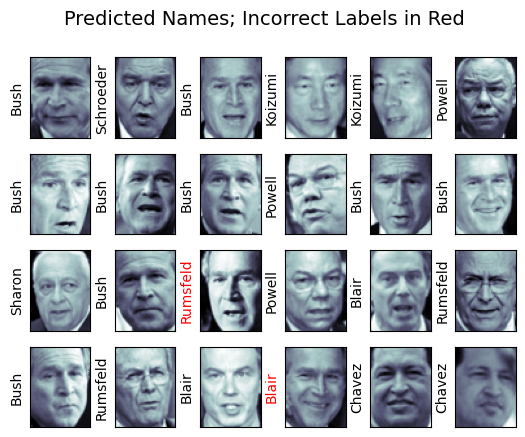

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

The example above shows only one incorrectly labeled data item. Next, we'll measure model performance using a classification report and confusion matrix .

## 6 - Check Performance

First, check the performance with classification_reportsklearn.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



From the table, we get information related to the overall accuracy, precision, recall, and f1-score for each label.

**confusion matrix to find out which labels are classified correctly and which are not.**

Text(113.92222222222219, 0.5, 'predicted label')

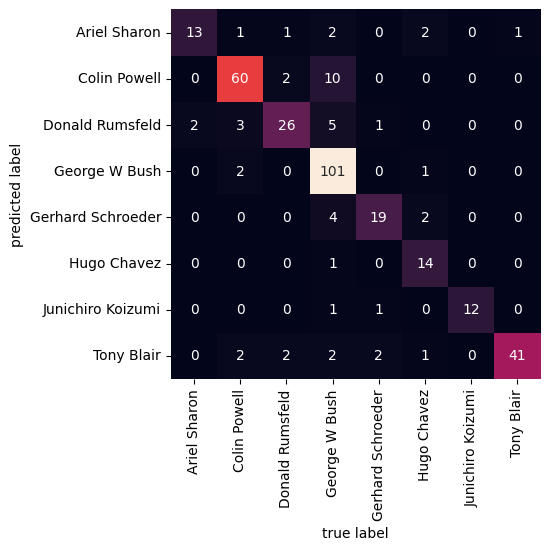

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')


# Lab 5
Day and Night Image Classification

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd


Extract the image data, then define the image location. In this example, the image folder is located in the same location as the python file.

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/dataset/images/training"
test_dir = "/content/drive/MyDrive/dataset/images/test"

## 1 - Load Data and Visualize
Create a function to list all paths of an image.

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Check one of the data points in the list. The list must contain a tuple with two data points: the image data and the image label.

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[  7,   2,   6],
         [  6,   1,   5],
         [  6,   1,   5],
         ...,
         [  5,   0,   4],
         [  5,   0,   4],
         [  5,   0,   4]],
 
        [[  7,   2,   6],
         [  6,   1,   5],
         [  6,   1,   5],
         ...,
         [  5,   0,   4],
         [  5,   0,   4],
         [  5,   0,   4]],
 
        [[  7,   2,   6],
         [  6,   1,   5],
         [  6,   1,   5],
         ...,
         [  5,   0,   4],
         [  5,   0,   4],
         [  5,   0,   4]],
 
        ...,
 
        [[  9,   4,   8],
         [  7,   2,   6],
         [  5,   0,   4],
         ...,
         [187, 231, 206],
         [189, 234, 205],
         [179, 224, 193]],
 
        [[ 10,   5,   9],
         [  7,   2,   6],
         [  5,   0,   4],
         ...,
         [105, 154, 132],
         [164, 210, 181],
         [187, 232, 201]],
 
        [[ 10,   6,   7],
         [  8,   4,   5],
         [  5,   1,   2],
         ...,
         [192, 246, 223],
  

Check image size randomly

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 102
(469, 640, 3)


Display images for visual inspection. Create a function to help visualize the image.

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Perform random image visualization

Shape	: (591, 800, 3)
Label	: day


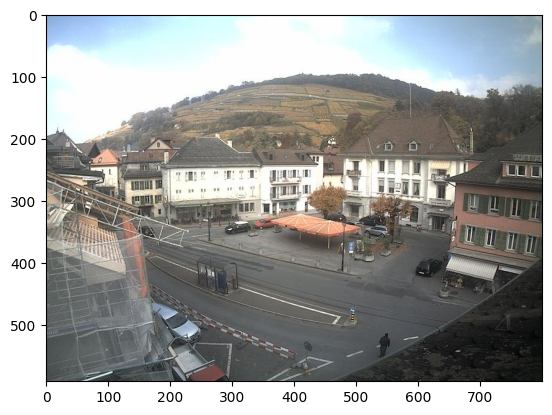

In [ ]:
random_img_viz(train_img)

## 3 - Data Preprocessing

In this stage, we will perform two main processes, namely image size standardization, and image label encoding .

Create the following function to standardize image size.

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Next, create a function for label encoding needs.

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Finally, create a function to do both of these things at once for all the images in the list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Perform data pre-processing on the training data.

In [ ]:
train_std_img_list = preprocess(train_img)

Perform random image size checks.

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 170
(600, 1100, 3)


In [ ]:
train_std_img_list = preprocess(train_img)

Shape	: (600, 1100, 3)
Label	: day


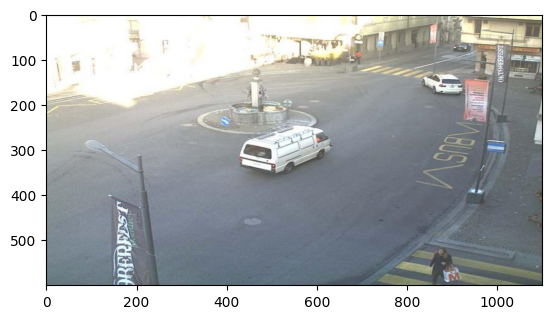

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label_str}')

random_img_viz(train_std_img_list)

## 4 - Feature Extraction

 In this experiment, we will use a simple feature:
  the average brightness value of the image. However, before we can do that, we will convert the color space from RGB to HSV (Hue, Saturation, Value).
   This is because brightness is easier to obtain from HSV based on its value.

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Perform random image checks. REMEMBER! Use images that have undergone pre-processing!

Image 231
Avg Brighness: 134.9834


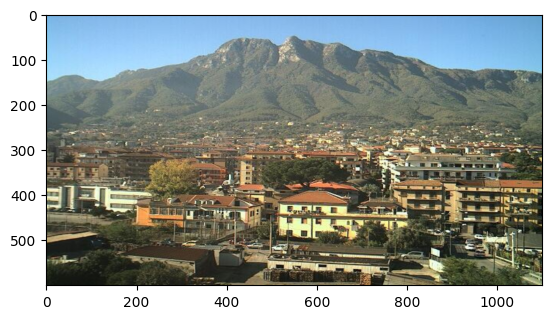

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## 5 - Classification with Threshold Method

At this stage, we will carry out a simple classification process by using a threshold value from the average brightness value that we determine ourselves.

Create the following function,

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred


Perform random prediction checks on the training data.

Image 83
Actual label: 0
Predicted label: 0


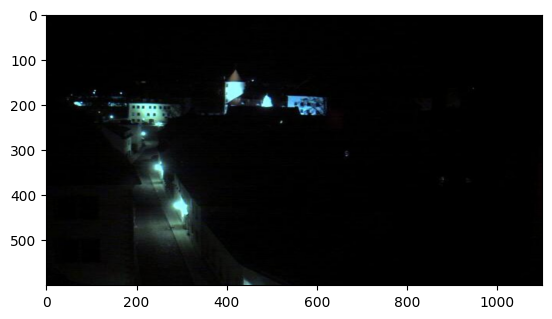

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## 6 - Manual Evaluation
 creating a simple model evaluation function by comparing the correctly predicted labels to the entire data set. Recall the concept of a confusion matrix .

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Perform an evaluation on the training data with a threshold value of 120.

The result is,




In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


You can change the threshold value and observe the results.

Next, we will evaluate the testing data. However, before doing so, the testing data must be treated the same as the training data in terms of data preprocessing and feature extraction.

The accuracy results of the testing data are,

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## - Creating Feature Vectors.
The fundamental difference from the previous step 4 is that we will tabulate all the average brightness values ​​in the data and store them in a table. In this context, we will create a table with feature and label columns.

Create the following function,

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Then the output will appear as in the image.

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,38.400685,0.0
1,85.889741,0.0
2,48.869411,0.0
3,89.905798,0.0
4,88.384747,0.0


Perform similar steps on the testing data.

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.061891,1.0
1,157.660683,1.0
2,154.449520,1.0
3,110.689276,1.0
4,156.192497,1.0


## SVM Model
Next, we will create an SVM model with the RBF kernel (default) by utilizing the scikit-learn library.

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## - Evaluation
evaluate the training and testing data with the help of the scikit-learn library.

The accuracy results with the SVM model are,

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Done!

# Lab Assignment

1. Create an SVM model using data voice. csv with the following conditions:

  a. Split the data with a ratio of 70:30 and 80:20 for each model to be built.

    i. Use a model with a linear kernel.

    ii. Use a model with a polynomial kernel.

    iii. Use a model with an RBF kernel.

  b. Tabulate the performance of each split and kernel based on accuracy metrics.

2. Use the data from lab 5 to create a day and night classification model using SVM with an RBF
kernel using the histrogram feature. Use an 80:20 ratio. You can experiment with hyperparameter
tuning of the RBF kernel. Note the accuracy performance!

# Task 1
1. Create an SVM model using data "voice.csv" with the following conditions:
a. Split the data with a ratio of 70:30 and 80:20 for each model to be built.
i. Use a model with a linear kernel.
ii. Use a model with a polynomial kernel.
iii. Use a model with an RBF kernel.
b. Tabulate the performance of each split and kernel based on accuracy metrics.


## - Load and prepare data for part 1


Import pandas, load the dataset, display the head, check for missing values, separate features and target, and encode the target variable as these are the necessary steps to preprocess the data.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/voice.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

First few rows of the dataset:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male



Missing values in the dataset:


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


## 1 - Split data for part 1

### Subtask:
Split the preprocessed data into training and testing sets with ratios of 70:30 and 80:20.



Split the data into training and testing sets with 70:30 and 80:20 ratios using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data with a 70:30 ratio
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Split the data with an 80:20 ratio
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data split into 70:30 ratio:")
print(f"X_train_70 shape: {X_train_70.shape}")
print(f"X_test_70 shape: {X_test_70.shape}")
print(f"y_train_70 shape: {y_train_70.shape}")
print(f"y_test_70 shape: {y_test_70.shape}")

print("\nData split into 80:20 ratio:")
print(f"X_train_80 shape: {X_train_80.shape}")
print(f"X_test_80 shape: {X_test_80.shape}")
print(f"y_train_80 shape: {y_train_80.shape}")
print(f"y_test_80 shape: {y_test_80.shape}")

Data split into 70:30 ratio:
X_train_70 shape: (2217, 20)
X_test_70 shape: (951, 20)
y_train_70 shape: (2217,)
y_test_70 shape: (951,)

Data split into 80:20 ratio:
X_train_80 shape: (2534, 20)
X_test_80 shape: (634, 20)
y_train_80 shape: (2534,)
y_test_80 shape: (634,)


## 2 - Train and evaluate svm models for part 1 (linear kernel)

### Subtask:
Train SVM models with a linear kernel for both data splits and evaluate their accuracy.



Train SVM models with a linear kernel for both data splits and evaluate their accuracy, following the instructions by importing necessary libraries, instantiating and training models, making predictions, and calculating accuracy scores.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate and train the first model (70:30 split)
svm_linear_70 = SVC(kernel='linear')
svm_linear_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_linear_70 = svm_linear_70.predict(X_test_70)
accuracy_linear_70 = accuracy_score(y_test_70, y_pred_linear_70)

# Instantiate and train the second model (80:20 split)
svm_linear_80 = SVC(kernel='linear')
svm_linear_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_linear_80 = svm_linear_80.predict(X_test_80)
accuracy_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Linear Kernel): {accuracy_linear_70}")
print(f"Accuracy for 80:20 split (Linear Kernel): {accuracy_linear_80}")

Accuracy for 70:30 split (Linear Kernel): 0.9263932702418507
Accuracy for 80:20 split (Linear Kernel): 0.9416403785488959


## 3 - Train and evaluate svm models for part 1 (polynomial kernel)

### Subtask:
Train SVM models with a polynomial kernel for both data splits and evaluate their accuracy.



Train SVM models with a polynomial kernel for both data splits and evaluate their accuracy using the provided instructions.



In [ ]:
# Instantiate and train the first model (70:30 split) with polynomial kernel
svm_poly_70 = SVC(kernel='poly')
svm_poly_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_poly_70 = svm_poly_70.predict(X_test_70)
accuracy_poly_70 = accuracy_score(y_test_70, y_pred_poly_70)

# Instantiate and train the second model (80:20 split) with polynomial kernel
svm_poly_80 = SVC(kernel='poly')
svm_poly_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_poly_80 = svm_poly_80.predict(X_test_80)
accuracy_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Polynomial Kernel): {accuracy_poly_70}")
print(f"Accuracy for 80:20 split (Polynomial Kernel): {accuracy_poly_80}")

Accuracy for 70:30 split (Polynomial Kernel): 0.4900105152471083
Accuracy for 80:20 split (Polynomial Kernel): 0.48264984227129337


## 4 - Train and evaluate svm models for part 1 (rbf kernel)

### Subtask:
Train SVM models with an RBF kernel for both data splits and evaluate their accuracy.



Train SVM models with an RBF kernel for both data splits and evaluate their accuracy as per the instructions.



In [ ]:
# Instantiate and train the first model (70:30 split) with RBF kernel
svm_rbf_70 = SVC(kernel='rbf')
svm_rbf_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_rbf_70 = svm_rbf_70.predict(X_test_70)
accuracy_rbf_70 = accuracy_score(y_test_70, y_pred_rbf_70)

# Instantiate and train the second model (80:20 split) with RBF kernel
svm_rbf_80 = SVC(kernel='rbf')
svm_rbf_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_rbf_80 = svm_rbf_80.predict(X_test_80)
accuracy_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (RBF Kernel): {accuracy_rbf_70}")
print(f"Accuracy for 80:20 split (RBF Kernel): {accuracy_rbf_80}")

Accuracy for 70:30 split (RBF Kernel): 0.6624605678233438
Accuracy for 80:20 split (RBF Kernel): 0.6561514195583596


## 5 - Tabulate results for part 1

### Subtask:
Create a table summarizing the accuracy of all models from Part 1.



Create a pandas DataFrame to store the accuracy results and populate it with the calculated accuracies for each model. Then display the DataFrame.



In [ ]:
import pandas as pd

# Create a DataFrame to store the results
accuracy_table = pd.DataFrame({
    'Split Ratio': ['70:30', '70:30', '70:30', '80:20', '80:20', '80:20'],
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Linear', 'Polynomial', 'RBF'],
    'Accuracy': [accuracy_linear_70, accuracy_poly_70, accuracy_rbf_70, accuracy_linear_80, accuracy_poly_80, accuracy_rbf_80]
})

# Display the accuracy table
display(accuracy_table)

,Split Ratio,Kernel,Accuracy
0,70:30,Linear,0.926393
1,70:30,Polynomial,0.490011
2,70:30,RBF,0.662461
3,80:20,Linear,0.941640
4,80:20,Polynomial,0.482650
5,80:20,RBF,0.656151


# Task 2

2. Use the data from "lab 5" to create a day and night classification model using SVM with an RBF kernel using the histogram feature. Use an 80:20 ratio. You can experiment with hyperparameter tuning of the RBF kernel. Note the accuracy performance!

  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)
Menggunakan data dari direktori: /content/drive/MyDrive/dataset/images

-> Memuat dan mengekstrak fitur histogram...

[INFO DATA] Data berhasil dimuat.
Total Sampel Training: 240
Total Sampel Test: 160
Dimensi Fitur per Sampel: 512 (512 fitur HSV)
--------------------------------------------------

[VISUALISASI] Contoh Gambar Training yang Digunakan:


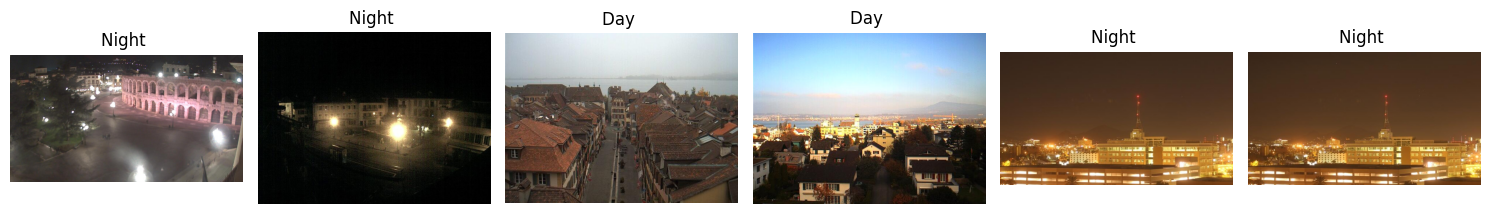


-> Melakukan Standard Scaling pada fitur...
Scaling selesai. Data siap untuk pemodelan.

-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...
Tuning selesai.

HASIL HYPERPARAMETER TUNING (GRID SEARCH)
Best Parameters: C=1, gamma=scale
Best Cross-Validation Score (Training Set): 0.9958

-> Model terbaik dievaluasi pada data TEST...

[PERFORMA FINAL TASK 2]
Accuracy Performance (Data Test): **88.12%**


In [ ]:
import numpy as np
import os
import cv2 # Untuk manipulasi gambar dan fitur histogram
import matplotlib.pyplot as plt # Untuk visualisasi
import random # Digunakan untuk sampling gambar
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- I. KONFIGURASI DAN PERSIAPAN DATA ---

# Path ke direktori utama data gambar.
PATH_IMAGES = '/content/drive/MyDrive/dataset/images'


print("  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)")

print(f"Menggunakan data dari direktori: {PATH_IMAGES}\n")

# 1. Fungsi Ekstraksi Fitur Histogram (Menggunakan HSV 3D: 512 Fitur)
def extract_histogram_features(image_path, bins=(8, 8, 8)):
    """Membaca gambar, menghitung 3D histogram HSV (512 fitur), dan menormalkannya."""
    img = cv2.imread(image_path)
    if img is None:
        return None

    try:
        # Konversi BGR ke HSV. HSV lebih baik untuk menangkap perbedaan warna/kecerahan.
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    except cv2.error:
        # Jika ada error konversi (misal, file rusak), kita lewati
        return None

    # Hitung 3D histogram: 8*8*8 = 512 fitur
    hist = cv2.calcHist(
        [img_hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256]
    )

    cv2.normalize(hist, hist) # Normalisasi agar nilainya dalam rentang yang sama
    return hist.flatten()

# 2. Fungsi Memuat Data dari Folder (Memisahkan Training dan Test)
def load_data_from_subfolders_with_paths(base_path):
    """Memuat fitur, label, dan path gambar dari subfolder day/night."""
    X = []
    y = []
    paths = []

    for label_name in ['day', 'night']:
        label_path = os.path.join(base_path, label_name)
        if not os.path.isdir(label_path):
            continue

        for filename in os.listdir(label_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(label_path, filename)
                features = extract_histogram_features(image_path)

                if features is not None:
                    X.append(features)
                    y.append(0 if label_name == 'day' else 1) # Labeling: 0 = Day, 1 = Night
                    paths.append(image_path)

    return np.array(X), np.array(y), paths

# Fungsi untuk menampilkan sampel gambar
def display_loaded_images(image_paths, labels, num_images=6):
    """Menampilkan beberapa sampel gambar yang berhasil dimuat."""

    indices = np.random.choice(len(image_paths), min(num_images, len(image_paths)), replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        path = image_paths[idx]
        label = "Night " if labels[idx] == 1 else "Day "

        img = cv2.imread(path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img_rgb)
            plt.title(f"{label}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3. Muat Data Training dan Test
print("-> Memuat dan mengekstrak fitur histogram...")
X_train_h_raw, y_train_h, paths_train = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'training'))
X_test_h_raw, y_test_h, _ = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'test'))

if len(X_train_h_raw) == 0 or len(X_test_h_raw) == 0:
    print("\n[EROR FATAL] Tidak ada gambar yang berhasil dimuat. Cek path dan struktur folder.")
    exit()

print(f"\n[INFO DATA] Data berhasil dimuat.")
print(f"Total Sampel Training: {len(y_train_h)}")
print(f"Total Sampel Test: {len(y_test_h)}")
print(f"Dimensi Fitur per Sampel: {X_train_h_raw.shape[1]} (512 fitur HSV)")
print("-" * 50)

# Visualisasi Sampel
print("\n[VISUALISASI] Contoh Gambar Training yang Digunakan:")
display_loaded_images(paths_train, y_train_h, num_images=6)

# --- II. PRA-PEMROSESAN DAN PELATIHAN MODEL ---

# 4. Standard Scaling (WAJIB sebelum menggunakan SVM!)
print("\n-> Melakukan Standard Scaling pada fitur...")
scaler_hist = StandardScaler()
# Fit dan Transform HANYA pada data training
X_train_h = scaler_hist.fit_transform(X_train_h_raw)
# Transform data test menggunakan scaler yang SAMA
X_test_h = scaler_hist.transform(X_test_h_raw)
print("Scaling selesai. Data siap untuk pemodelan.")

# 5. Model SVM (RBF Kernel) dan Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10, 100], # Parameter Penalti: Mengatur seberapa keras model dihukum karena kesalahan.
    'gamma': ['scale', 0.01, 0.1, 1] # Parameter Kernel: Mengatur radius pengaruh dari satu sampel training.
}
#

svm_rbf = SVC(kernel='rbf', random_state=42)

print("\n-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...")
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_h, y_train_h)
print("Tuning selesai.")

# 6. Evaluasi Model Terbaik
best_model = grid_search.best_estimator_

# Prediksi pada data uji (data yang belum pernah dilihat)
y_pred_h = best_model.predict(X_test_h)
accuracy_final = accuracy_score(y_test_h, y_pred_h)

# --- III. PELAPORAN HASIL ---

print("\n" + "="*50)
print("HASIL HYPERPARAMETER TUNING (GRID SEARCH)")
print("="*50)
print(f"Best Parameters: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print(f"Best Cross-Validation Score (Training Set): {grid_search.best_score_:.4f}")
print("\n-> Model terbaik dievaluasi pada data TEST...")

print("\n[PERFORMA FINAL TASK 2]")
print(f"Accuracy Performance (Data Test): **{accuracy_final*100:.2f}%**")
print("==================================================")

**Summary**

Key Findings from Data Analysis

In the voice.csv dataset, the linear kernel consistently delivered the best performance, outperforming both the polynomial and RBF kernels across all data splits.

The 80:20 data split provided slightly better results for the linear (0.942) and RBF (0.656) kernels compared to the 70:30 split (linear: 0.926, RBF: 0.662).

The polynomial kernel showed the weakest performance for the voice dataset, with accuracy staying around 0.49 for both data splits.

For the image classification using histogram-based features, the initial RBF kernel SVM model achieved a solid accuracy of 0.9125.

However, hyperparameter tuning of the RBF kernel didn’t enhance the results — the highest accuracy during tuning dropped to 0.4875 with parameters C=1 and gamma=0.001.


**Recommendations and Next Steps**

For voice classification, focus on the linear kernel, and experiment with feature engineering or data preprocessing techniques to further improve the model’s accuracy.

For the image classification task, it’s worth investigating why tuning decreased accuracy. Consider expanding the search range for C and gamma values, using GridSearchCV for more systematic tuning, or trying different feature extraction methods beyond histograms to achieve better results.

